In [3]:
import os

import numpy as np
import pandas as pd

from utils.plotting import plot_histogram_kde

import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")

In [4]:
DATA_PATH = "../data"

In [5]:
os.listdir(DATA_PATH)

datasets = {}

for car in os.listdir(DATA_PATH):
    datasets[car] = {}

    for obd_type in os.listdir(DATA_PATH + "/" + car):
        datasets[car][obd_type] = {}

        for csv_file in os.listdir(DATA_PATH + "/" + car + "/" + obd_type):
            if "debug" in csv_file:
                datasets[car][obd_type]["debug"] = pd.read_csv(DATA_PATH + "/" + car + "/" + obd_type + "/" + csv_file)
            else:
                datasets[car][obd_type]["data"] = pd.read_csv(DATA_PATH + "/" + car + "/" + obd_type + "/" + csv_file)

In [47]:
def compute_total_time(dataset):
    times = []

    for batch in range(dataset.shape[0] // 27):
        init = batch * 27
        end = (batch + 1) * 27
        sum_interval = dataset.iloc[init:end]["Interval"].sum()

        times.append(sum_interval)

    times_avg = np.mean(times)
    times_err = np.std(times) / np.sqrt(len(times))

    return times_avg, times_err

In [46]:
datasets["polo_prata"]["A"]["data"].head()

,Device,Usuario,SessionDate,TimeSensor,Vin,Latitude,Longitude,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,...,EthanolPercentage,RelativeThrottlePos,AcceleratorPedalPosD,AcceleratorPedalPosE,AbsoluterThrottlePosB,CatalystTempBank1Sensor1,EngineFuelRate,AbsoluteLoadValue,AirFuelRatio,AbsoluteBarometricPressure
0,9c3c7b3649031573,hilton.thallyson@gmail.com,2025-02-13 13:34:00,2025-02-13 13:34:01.310694,9BWAH5BZ4KP599863,0.000000,0.000000,-0.452543,4.953442,8.388937,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9c3c7b3649031573,hilton.thallyson@gmail.com,2025-02-13 13:34:00,2025-02-13 13:34:02.309164,9BWAH5BZ4KP599863,0.000000,0.000000,-0.229711,4.469793,8.949157,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9c3c7b3649031573,hilton.thallyson@gmail.com,2025-02-13 13:34:00,2025-02-13 13:34:03.310309,9BWAH5BZ4KP599863,-5.842986,-35.197654,-1.295115,7.646863,6.176773,...,26.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9c3c7b3649031573,hilton.thallyson@gmail.com,2025-02-13 13:34:00,2025-02-13 13:34:04.310620,9BWAH5BZ4KP599863,-5.842986,-35.197654,-0.189033,8.609076,10.397712,...,26.27,13.0,15.0,15.0,83.0,206.3,0.0,68.0,NaN,NaN
4,9c3c7b3649031573,hilton.thallyson@gmail.com,2025-02-13 13:34:00,2025-02-13 13:34:05.308647,9BWAH5BZ4KP599863,-5.842986,-35.197654,1.886442,4.608576,8.628220,...,26.27,13.0,15.0,15.0,83.0,206.3,0.0,68.0,1.0,100.0


# Data Analysis

In [6]:
algorithmns_columns = [col for col in datasets["fit"]["A"]["data"].columns if "(microseconds)" in col]

algorithmns_columns

['FuelModelPredictionTime(microseconds)',
 'TedaModelPredictionTime(microseconds)',
 'DriveBehaviourModelPredictionTime(microseconds)',
 'CityRoadModelPredictionTime(microseconds)']

In [7]:
algorithmns_data = pd.concat(
    [
        datasets[car][obd_type]["data"][algorithmns_columns]
        for car in datasets.keys()
        for obd_type in datasets[car].keys() if "data" in datasets[car][obd_type].keys()
    ],
    axis=0,
    ignore_index=True
)

In [8]:
algorithmns_data.describe()

,FuelModelPredictionTime(microseconds),TedaModelPredictionTime(microseconds),DriveBehaviourModelPredictionTime(microseconds),CityRoadModelPredictionTime(microseconds)
count,5866.000000,5866.000000,5866.000000,5866.000000
mean,237.109274,2.006308,328.544494,179.755711
std,538.450440,6.814942,194.068973,92.744211
min,0.000000,0.000000,0.000000,20.000000
25%,142.000000,1.000000,220.000000,116.000000
50%,207.000000,2.000000,306.000000,174.000000
75%,253.000000,2.000000,372.000000,212.000000
max,24878.000000,457.000000,3680.000000,2466.000000


## FuelModelPredictionTime

In [9]:
(algorithmns_data["FuelModelPredictionTime(microseconds)"] > 2000).sum()

np.int64(15)

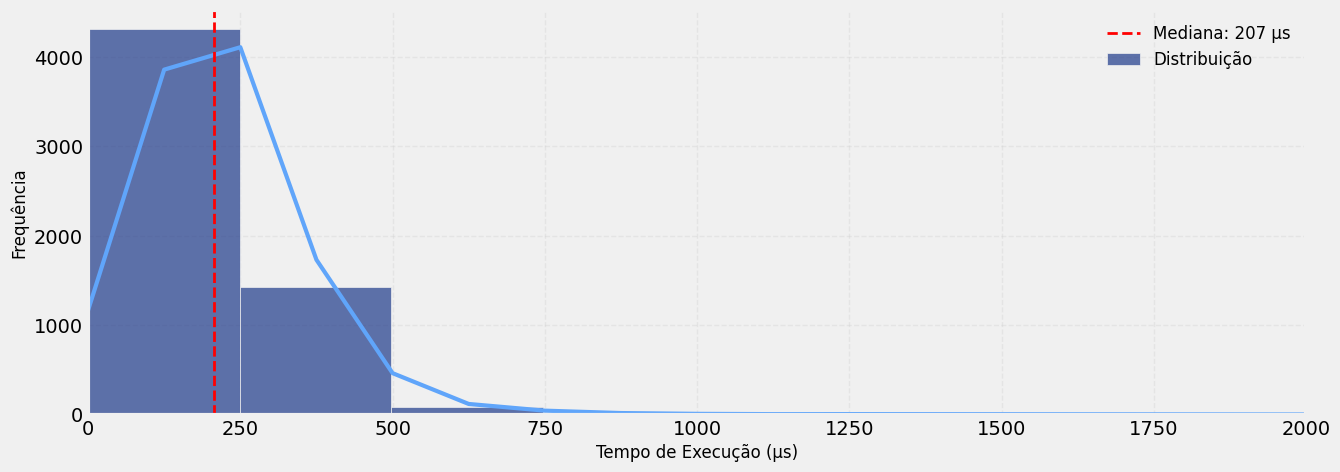

In [10]:
plot_histogram_kde(
    data=algorithmns_data,
    variable="FuelModelPredictionTime(microseconds)",
    bins=100,
    hist_color="#1E3A8A",
    kde_color="#60A5FA",
    show_median=True,
    median_color="red",
    xlabel="Tempo de Execução (µs)",
    ylabel="Frequência",
    xlim=(0, 2000)
)

In [11]:
Q1 = np.percentile(algorithmns_data["FuelModelPredictionTime(microseconds)"], 25)
Q3 = np.percentile(algorithmns_data["FuelModelPredictionTime(microseconds)"], 75)
IQR = Q3 - Q1

outlier_lower = Q1 - 1.5 * IQR
outlier_upper = Q3 + 1.5 * IQR

prediction_time = [t for t in algorithmns_data["FuelModelPredictionTime(microseconds)"] if outlier_lower <= t <= outlier_upper]

In [12]:
incerteza = np.std(prediction_time) / np.sqrt(len(prediction_time))

print(f"{np.mean(prediction_time)} ± {incerteza}")

201.41369421043197 ± 1.0368378264036402


## TedaModelPredictionTime

In [13]:
(algorithmns_data["TedaModelPredictionTime(microseconds)"] > 50).sum()

np.int64(6)

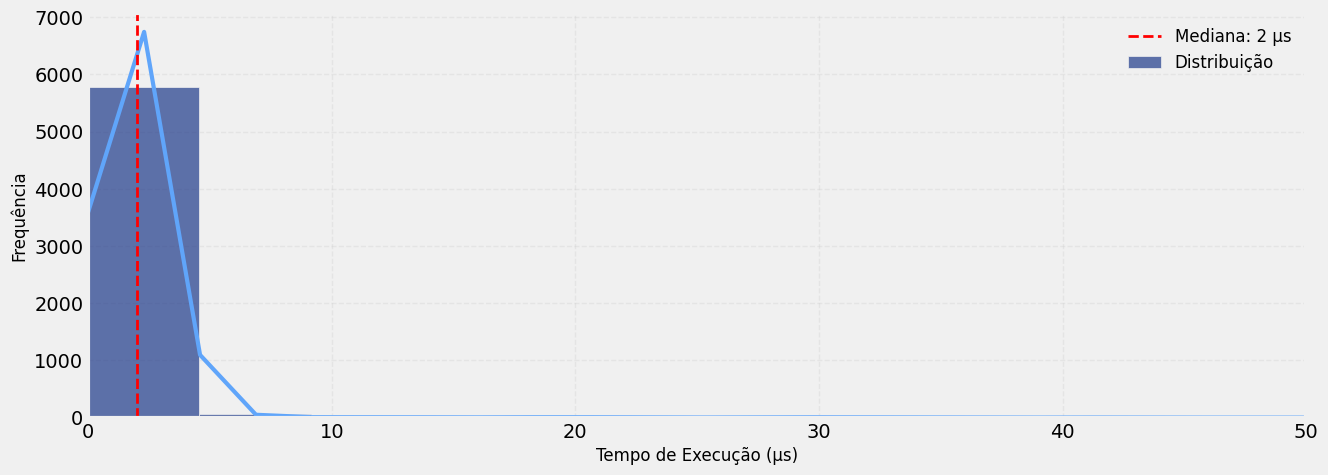

In [14]:
plot_histogram_kde(
    data=algorithmns_data,
    variable="TedaModelPredictionTime(microseconds)",
    bins=100,
    hist_color="#1E3A8A",
    kde_color="#60A5FA",
    show_median=True,
    median_color="red",
    xlabel="Tempo de Execução (µs)",
    ylabel="Frequência",
    xlim=(0, 50)
)

In [15]:
Q1 = np.percentile(algorithmns_data["TedaModelPredictionTime(microseconds)"], 25)
Q3 = np.percentile(algorithmns_data["TedaModelPredictionTime(microseconds)"], 75)
IQR = Q3 - Q1

outlier_lower = Q1 - 1.5 * IQR
outlier_upper = Q3 + 1.5 * IQR

prediction_time = [t for t in algorithmns_data["TedaModelPredictionTime(microseconds)"] if outlier_lower <= t <= outlier_upper]

In [16]:
incerteza = np.std(prediction_time) / np.sqrt(len(prediction_time))

print(f"{np.mean(prediction_time)} ± {incerteza}")

1.6655977195795475 ± 0.009293842678061697


## DriveBehaviourModelPredictionTime

In [17]:
(algorithmns_data["DriveBehaviourModelPredictionTime(microseconds)"] > 2000).sum()

np.int64(8)

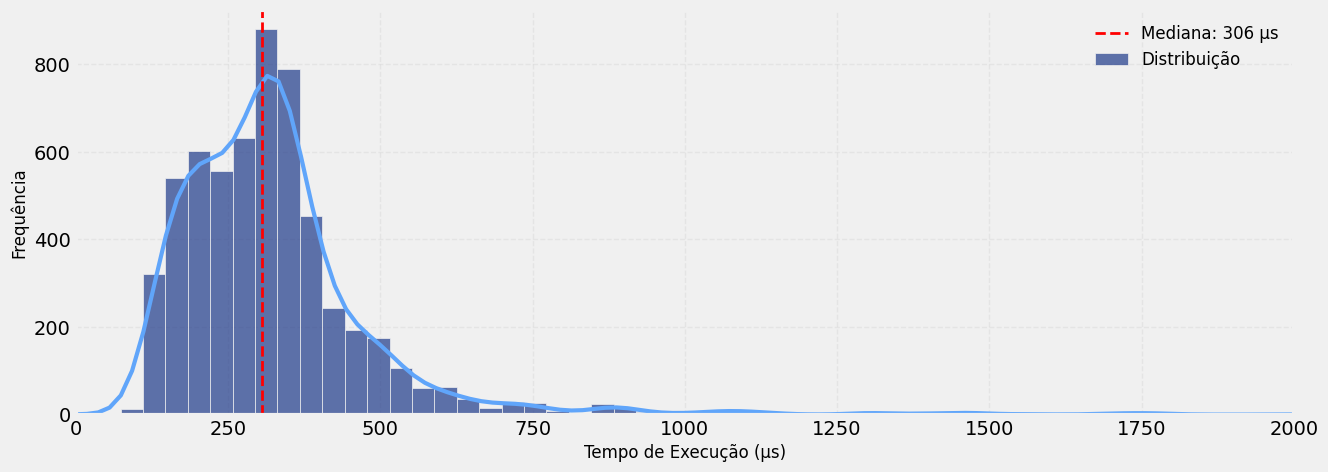

In [18]:
plot_histogram_kde(
    data=algorithmns_data,
    variable="DriveBehaviourModelPredictionTime(microseconds)",
    bins=100,
    hist_color="#1E3A8A",
    kde_color="#60A5FA",
    show_median=True,
    median_color="red",
    xlabel="Tempo de Execução (µs)",
    ylabel="Frequência",
    xlim=(0, 2000)
)

In [19]:
Q1 = np.percentile(algorithmns_data["DriveBehaviourModelPredictionTime(microseconds)"], 25)
Q3 = np.percentile(algorithmns_data["DriveBehaviourModelPredictionTime(microseconds)"], 75)
IQR = Q3 - Q1

outlier_lower = Q1 - 1.5 * IQR
outlier_upper = Q3 + 1.5 * IQR

prediction_time = [t for t in algorithmns_data["DriveBehaviourModelPredictionTime(microseconds)"] if outlier_lower <= t <= outlier_upper]

In [20]:
incerteza = np.std(prediction_time) / np.sqrt(len(prediction_time))

print(f"{np.mean(prediction_time)} ± {incerteza}")

299.45293802464727 ± 1.396349411646841


## CityRoadModelPredictionTime

In [21]:
(algorithmns_data["CityRoadModelPredictionTime(microseconds)"] > 600).sum()

np.int64(21)

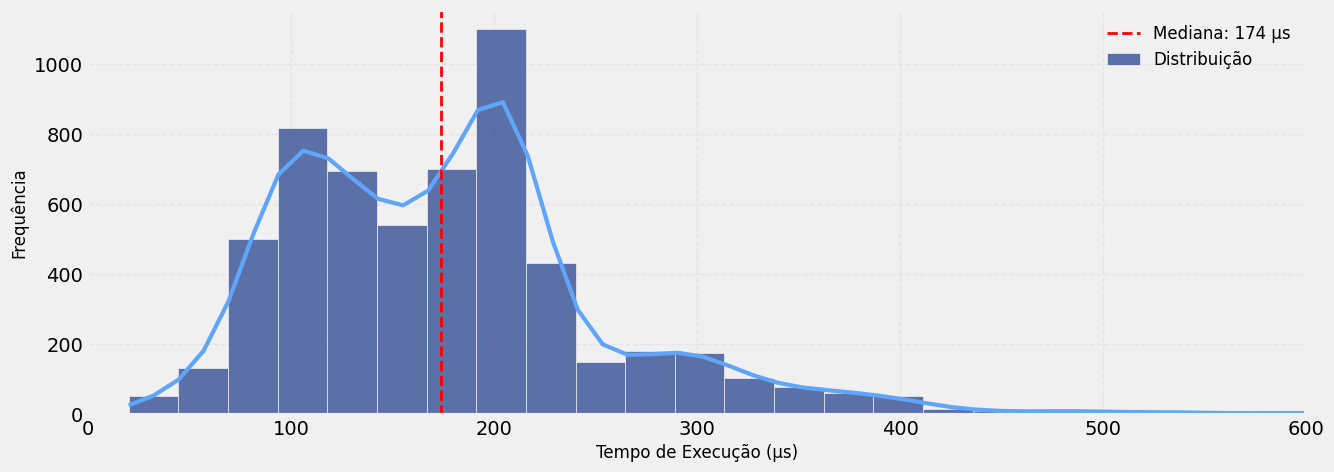

In [22]:
plot_histogram_kde(
    data=algorithmns_data,
    variable="CityRoadModelPredictionTime(microseconds)",
    bins=100,
    hist_color="#1E3A8A",
    kde_color="#60A5FA",
    show_median=True,
    median_color="red",
    xlabel="Tempo de Execução (µs)",
    ylabel="Frequência",
    xlim=(0, 600)
)

In [23]:
Q1 = np.percentile(algorithmns_data["CityRoadModelPredictionTime(microseconds)"], 25)
Q3 = np.percentile(algorithmns_data["CityRoadModelPredictionTime(microseconds)"], 75)
IQR = Q3 - Q1

outlier_lower = Q1 - 1.5 * IQR
outlier_upper = Q3 + 1.5 * IQR

prediction_time = [t for t in algorithmns_data["CityRoadModelPredictionTime(microseconds)"] if outlier_lower <= t <= outlier_upper]

In [24]:
incerteza = np.std(prediction_time) / np.sqrt(len(prediction_time))

print(f"{np.mean(prediction_time)} ± {incerteza}")

168.84408221119773 ± 0.8745223185964718


# Times - FuelModelPredictionTime

## Polo Prata

In [58]:
algorithmns_columns

['FuelModelPredictionTime(microseconds)',
 'TedaModelPredictionTime(microseconds)',
 'DriveBehaviourModelPredictionTime(microseconds)',
 'CityRoadModelPredictionTime(microseconds)']

In [67]:
Q1 = np.percentile(datasets["polo_prata"]["A"]["data"]["FuelModelPredictionTime(microseconds)"], 25)

Q1 = np.percentile(datasets["polo_prata"]["A"]["data"]["FuelModelPredictionTime(microseconds)"], 25)
Q3 = np.percentile(datasets["polo_prata"]["A"]["data"]["FuelModelPredictionTime(microseconds)"], 75)
IQR = Q3 - Q1

outlier_lower = Q1 - 1.5 * IQR
outlier_upper = Q3 + 1.5 * IQR

prediction_time = [t for t in datasets["polo_prata"]["A"]["data"]["FuelModelPredictionTime(microseconds)"] if outlier_lower <= t <= outlier_upper]
incerteza = np.std(prediction_time) / np.sqrt(len(prediction_time))

print(f"{np.mean(prediction_time):.2f} ± {incerteza:.2f}")

223.78 ± 2.51


In [68]:
Q1 = np.percentile(datasets["polo_prata"]["B"]["data"]["FuelModelPredictionTime(microseconds)"], 25)

Q1 = np.percentile(datasets["polo_prata"]["B"]["data"]["FuelModelPredictionTime(microseconds)"], 25)
Q3 = np.percentile(datasets["polo_prata"]["B"]["data"]["FuelModelPredictionTime(microseconds)"], 75)
IQR = Q3 - Q1

outlier_lower = Q1 - 1.5 * IQR
outlier_upper = Q3 + 1.5 * IQR

prediction_time = [t for t in datasets["polo_prata"]["B"]["data"]["FuelModelPredictionTime(microseconds)"] if outlier_lower <= t <= outlier_upper]
incerteza = np.std(prediction_time) / np.sqrt(len(prediction_time))

print(f"{np.mean(prediction_time):.2f} ± {incerteza:.2f}")

185.51 ± 3.82


## Polo Branco

In [69]:
Q1 = np.percentile(datasets["polo_branco"]["A"]["data"]["FuelModelPredictionTime(microseconds)"], 25)

Q1 = np.percentile(datasets["polo_branco"]["A"]["data"]["FuelModelPredictionTime(microseconds)"], 25)
Q3 = np.percentile(datasets["polo_branco"]["A"]["data"]["FuelModelPredictionTime(microseconds)"], 75)
IQR = Q3 - Q1

outlier_lower = Q1 - 1.5 * IQR
outlier_upper = Q3 + 1.5 * IQR

prediction_time = [t for t in datasets["polo_branco"]["A"]["data"]["FuelModelPredictionTime(microseconds)"] if outlier_lower <= t <= outlier_upper]
incerteza = np.std(prediction_time) / np.sqrt(len(prediction_time))

print(f"{np.mean(prediction_time):.2f} ± {incerteza:.2f}")

314.27 ± 5.02


In [70]:
Q1 = np.percentile(datasets["polo_branco"]["B"]["data"]["FuelModelPredictionTime(microseconds)"], 25)

Q1 = np.percentile(datasets["polo_branco"]["B"]["data"]["FuelModelPredictionTime(microseconds)"], 25)
Q3 = np.percentile(datasets["polo_branco"]["B"]["data"]["FuelModelPredictionTime(microseconds)"], 75)
IQR = Q3 - Q1

outlier_lower = Q1 - 1.5 * IQR
outlier_upper = Q3 + 1.5 * IQR

prediction_time = [t for t in datasets["polo_branco"]["B"]["data"]["FuelModelPredictionTime(microseconds)"] if outlier_lower <= t <= outlier_upper]
incerteza = np.std(prediction_time) / np.sqrt(len(prediction_time))

print(f"{np.mean(prediction_time):.2f} ± {incerteza:.2f}")

210.83 ± 2.94


## Fit

In [71]:
Q1 = np.percentile(datasets["fit"]["A"]["data"]["FuelModelPredictionTime(microseconds)"], 25)

Q1 = np.percentile(datasets["fit"]["A"]["data"]["FuelModelPredictionTime(microseconds)"], 25)
Q3 = np.percentile(datasets["fit"]["A"]["data"]["FuelModelPredictionTime(microseconds)"], 75)
IQR = Q3 - Q1

outlier_lower = Q1 - 1.5 * IQR
outlier_upper = Q3 + 1.5 * IQR

prediction_time = [t for t in datasets["fit"]["A"]["data"]["FuelModelPredictionTime(microseconds)"] if outlier_lower <= t <= outlier_upper]
incerteza = np.std(prediction_time) / np.sqrt(len(prediction_time))

print(f"{np.mean(prediction_time):.2f} ± {incerteza:.2f}")

191.06 ± 1.96


In [72]:
Q1 = np.percentile(datasets["fit"]["B"]["data"]["FuelModelPredictionTime(microseconds)"], 25)

Q1 = np.percentile(datasets["fit"]["B"]["data"]["FuelModelPredictionTime(microseconds)"], 25)
Q3 = np.percentile(datasets["fit"]["B"]["data"]["FuelModelPredictionTime(microseconds)"], 75)
IQR = Q3 - Q1

outlier_lower = Q1 - 1.5 * IQR
outlier_upper = Q3 + 1.5 * IQR

prediction_time = [t for t in datasets["fit"]["B"]["data"]["FuelModelPredictionTime(microseconds)"] if outlier_lower <= t <= outlier_upper]
incerteza = np.std(prediction_time) / np.sqrt(len(prediction_time))

print(f"{np.mean(prediction_time):.2f} ± {incerteza:.2f}")

202.73 ± 1.05


## TCross

In [73]:
Q1 = np.percentile(datasets["tcross"]["A"]["data"]["FuelModelPredictionTime(microseconds)"], 25)

Q1 = np.percentile(datasets["tcross"]["A"]["data"]["FuelModelPredictionTime(microseconds)"], 25)
Q3 = np.percentile(datasets["tcross"]["A"]["data"]["FuelModelPredictionTime(microseconds)"], 75)
IQR = Q3 - Q1

outlier_lower = Q1 - 1.5 * IQR
outlier_upper = Q3 + 1.5 * IQR

prediction_time = [t for t in datasets["tcross"]["A"]["data"]["FuelModelPredictionTime(microseconds)"] if outlier_lower <= t <= outlier_upper]
incerteza = np.std(prediction_time) / np.sqrt(len(prediction_time))

print(f"{np.mean(prediction_time):.2f} ± {incerteza:.2f}")

125.15 ± 0.80


In [74]:
Q1 = np.percentile(datasets["tcross"]["B"]["data"]["FuelModelPredictionTime(microseconds)"], 25)

Q1 = np.percentile(datasets["tcross"]["B"]["data"]["FuelModelPredictionTime(microseconds)"], 25)
Q3 = np.percentile(datasets["tcross"]["B"]["data"]["FuelModelPredictionTime(microseconds)"], 75)
IQR = Q3 - Q1

outlier_lower = Q1 - 1.5 * IQR
outlier_upper = Q3 + 1.5 * IQR

prediction_time = [t for t in datasets["tcross"]["B"]["data"]["FuelModelPredictionTime(microseconds)"] if outlier_lower <= t <= outlier_upper]
incerteza = np.std(prediction_time) / np.sqrt(len(prediction_time))

print(f"{np.mean(prediction_time):.2f} ± {incerteza:.2f}")

155.71 ± 1.49


## HB20

In [75]:
Q1 = np.percentile(datasets["hb20"]["A"]["data"]["FuelModelPredictionTime(microseconds)"], 25)

Q1 = np.percentile(datasets["hb20"]["A"]["data"]["FuelModelPredictionTime(microseconds)"], 25)
Q3 = np.percentile(datasets["hb20"]["A"]["data"]["FuelModelPredictionTime(microseconds)"], 75)
IQR = Q3 - Q1

outlier_lower = Q1 - 1.5 * IQR
outlier_upper = Q3 + 1.5 * IQR

prediction_time = [t for t in datasets["hb20"]["A"]["data"]["FuelModelPredictionTime(microseconds)"] if outlier_lower <= t <= outlier_upper]
incerteza = np.std(prediction_time) / np.sqrt(len(prediction_time))

print(f"{np.mean(prediction_time):.2f} ± {incerteza:.2f}")

220.06 ± 3.47


In [76]:
Q1 = np.percentile(datasets["hb20"]["B"]["data"]["FuelModelPredictionTime(microseconds)"], 25)

Q1 = np.percentile(datasets["hb20"]["B"]["data"]["FuelModelPredictionTime(microseconds)"], 25)
Q3 = np.percentile(datasets["hb20"]["B"]["data"]["FuelModelPredictionTime(microseconds)"], 75)
IQR = Q3 - Q1

outlier_lower = Q1 - 1.5 * IQR
outlier_upper = Q3 + 1.5 * IQR

prediction_time = [t for t in datasets["hb20"]["B"]["data"]["FuelModelPredictionTime(microseconds)"] if outlier_lower <= t <= outlier_upper]
incerteza = np.std(prediction_time) / np.sqrt(len(prediction_time))

print(f"{np.mean(prediction_time):.2f} ± {incerteza:.2f}")

241.54 ± 3.96
